# Построение моделей с помощью алгоритмов машинного обучения 

Мы для построения модлей будем  использовать алгоритмы ансамблевого обучения для построения различных моделей. Перед построением и обучением модели нам нужно отделить зависимую переменную и разделить набор данных на набор для обучения и тестирования.

In [1]:
##Импорт библиотек 
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 

In [2]:
## Для игнорирования предупреждений о просмотре чистого вывода
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
## Загружаем базу данных 
df = pd.read_csv('cleaned_work.csv',header=0)

In [4]:
df.sample(10)

,Year,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha
7083,2014,Ak_Suuisky_peg,Black Soil,25.5,13.0,559.8,68.0,345.0
1891,2018,Tupsky_peg,Black Soil,21.5,13.0,543.8,50.0,2134.0
5644,2019,Issyk_Kulsky_peg,Black Soil,24.5,14.0,811.2,66.0,240.0
6918,2014,Tupsky_peg,Black Soil,26.5,13.0,559.8,74.0,2725.0
2173,2018,Jety_Ogyz_peg,Light Soil,31.0,11.0,543.8,73.0,2985.0
6300,2014,Ak_Suuisky_peg,Black Soil,22.5,13.0,559.8,67.0,135.0
3643,2017,Jety_Ogyz_peg,Light Soil,31.0,14.0,612.0,63.0,1560.0
4854,2019,Issyk_Kulsky_peg,Black Soil,24.5,12.5,811.2,36.0,650.0
3490,2017,Tupsky_peg,Black Soil,30.5,14.5,612.0,43.0,713.0
6998,2014,Tupsky_peg,Black Soil,29.0,11.5,559.8,41.0,2025.0


In [5]:
df.drop(['Year'],axis=1, inplace=True)

In [6]:
df.head()

,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha
0,Issyk_Kulsky_peg,Black Soil,31.0,13.0,811.2,68.0,980.0
1,Issyk_Kulsky_peg,Black Soil,30.5,16.0,811.2,72.0,670.0
2,Issyk_Kulsky_peg,Black Soil,29.5,14.0,811.2,68.0,730.0
3,Issyk_Kulsky_peg,Black Soil,30.0,13.0,811.2,54.0,710.0
4,Issyk_Kulsky_peg,Black Soil,31.0,12.0,811.2,70.0,780.0


In [7]:
df.shape

(8077, 7)

In [8]:
### Разделение независимой и зависимой функции
X = df.iloc[:,:-1]
y = df.iloc[:, 6]

In [91]:
y

0        980.0
1        670.0
2        730.0
3        710.0
4        780.0
         ...  
8072    1710.0
8073    2030.0
8074    1325.0
8075    1743.0
8076    1765.0
Name: Yield Kg/ha, Length: 8077, dtype: float64

In [9]:
X.head()

,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity
0,Issyk_Kulsky_peg,Black Soil,31.0,13.0,811.2,68.0
1,Issyk_Kulsky_peg,Black Soil,30.5,16.0,811.2,72.0
2,Issyk_Kulsky_peg,Black Soil,29.5,14.0,811.2,68.0
3,Issyk_Kulsky_peg,Black Soil,30.0,13.0,811.2,54.0
4,Issyk_Kulsky_peg,Black Soil,31.0,12.0,811.2,70.0


In [10]:
X.shape

(8077, 6)

In [11]:
y.head()

0    980.0
1    670.0
2    730.0
3    710.0
4    780.0
Name: Yield Kg/ha, dtype: float64

### Преобразование данных
#### Обработка категориальных переменных — создание фиктивных переменных (изменение категориального значения на числовое (0,1))

In [12]:
# Показывает количество столбцов после создания фиктивных переменных
pd.get_dummies(df,drop_first=True).shape

(8077, 9)

In [13]:
X = pd.get_dummies(X, drop_first=True)

In [14]:
X.sample(4)

,Max_Temperature,Min_Teperature,Rainfall,Humidity,Location_Issyk_Kulsky_peg,Location_Jety_Ogyz_peg,Location_Tupsky_peg,Soil Type_Light Soil
612,27.0,14.0,811.2,60.0,0,0,1,0
845,29.5,12.5,811.2,66.0,0,0,1,0
624,26.5,16.0,811.2,51.0,0,0,1,0
1640,30.0,14.5,543.8,52.0,0,1,0,1


In [15]:
X.shape

(8077, 8)

# Стандартизация
Перед построением модели нам нужно стандартизировать функции

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [92]:
## Показывает, находятся ли функции в стандартизированном формате или нет
print("Среднее значение набора данных:", np.mean(X).round(8))
print("Стандартное отклонение набора данных: ", np.std(X).round(8))

Среднее значение набора данных: -0.0
Стандартное отклонение набора данных:  1.0


### Разделение набора данных на набор для обучения и тестирования

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
 # Вывод формы нашего обучающего и тестового набора
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6461, 8)
(1616, 8)
(6461,)
(1616,)


### Построение регрессионной модели с помощью алгоритма случайный лес 

In [88]:
from sklearn.ensemble import RandomForestRegressor
import time
start_time = time.time()
RF=RandomForestRegressor()
# Ввод обучающих данных в модель
RF.fit(X_train, y_train)
print("Время выполнения : " + str((time.time() - start_time)) + ' sec')

Время выполнения : 1.3843493461608887 sec


In [49]:
# Прогнозирование значений для X_test
predictions=RF.predict(X_test)

In [93]:
predictions

array([2646.29931613,  733.7975614 , 1527.55386568, ..., 2480.15479499,
       1948.99334084,  528.8329621 ])

In [50]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 490.44340943737234
MSE: 496766.5915487585
RMSE: 704.8167077678838


In [51]:
RF.score(X_test,y_test)

0.5941980982643729

In [52]:
RF.score(X_train,y_train)

0.9357056381490814

In [53]:
y_pred=RF.predict(X_test)

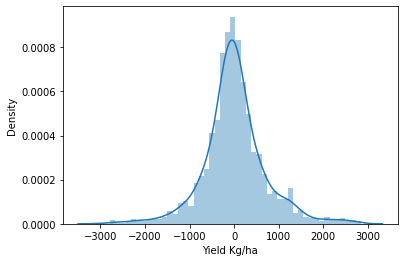

In [54]:
sns.distplot(y_test-y_pred)
plt.show()

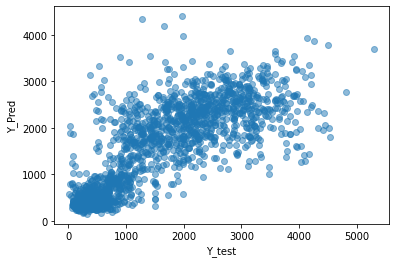

In [27]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()

In [28]:
metrics.r2_score(y_test,y_pred)

0.592475911991121

### Построение регрессионной модели с помощью Адабуст -AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostRegressor
import time
start_time = time.time()
RF=AdaBoostRegressor()
# Ввод данных в обучающий модель 
RF.fit(X_train, y_train)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.0758981704711914 sec


In [56]:
# Прогнозирование на X_test
predictions=RF.predict(X_test)

In [57]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 579.4921906807015
MSE: 571210.7979094051
RMSE: 755.7848886484865


In [58]:
RF.score(X_test,y_test)

0.5333856341649534

In [59]:
RF.score(X_train,y_train)

0.5313862877477085

In [60]:
y_pred=RF.predict(X_test)

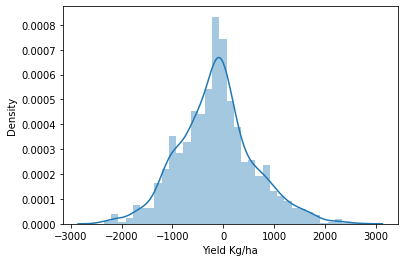

In [61]:
sns.distplot(y_test-y_pred)
plt.show()

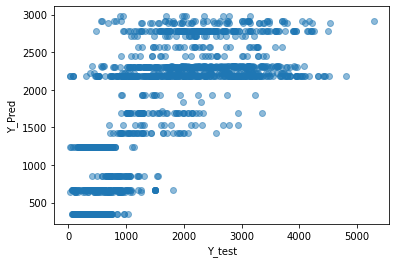

In [62]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()

In [89]:
from sklearn.ensemble import AdaBoostRegressor
import time
start_time = time.time()
RF=AdaBoostRegressor()
# Обучение модели на данных 
RF.fit(X_train, y_train)
print("Время выполнения : " + str((time.time() - start_time)) + ' sec')

Время выполнения : 0.07092094421386719 sec


In [64]:
# Прогнозирование на X_test
predictions=RF.predict(X_test)

In [65]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 583.1287495959529
MSE: 577341.7672720208
RMSE: 759.8300910545862


In [66]:
RF.score(X_test,y_test)

0.5283773283143612

In [67]:
RF.score(X_train,y_train)

0.5278030637234516

### Прогнозирование с помощью градиентного бустинга 

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
start_time = time.time()
RF = GradientBoostingRegressor() 
RF.fit(X_train, y_train) 
   
# Прогнозирование на тестовом множестве  
y_pred = RF.predict(X_test)
print("Время выполнения : " + str((time.time() - start_time)) + ' sec')

Время выполнения : 0.28191375732421875 sec


In [70]:
# Прогнозирование на тестовом множестве
predictions=RF.predict(X_test)

In [71]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 489.8794566898396
MSE: 461711.02018736186
RMSE: 679.4932083452799


In [72]:
RF.score(X_test,y_test)

0.6228345198090118

In [73]:
RF.score(X_train,y_train)

0.6359209826902078

In [74]:
y_pred=RF.predict(X_test)

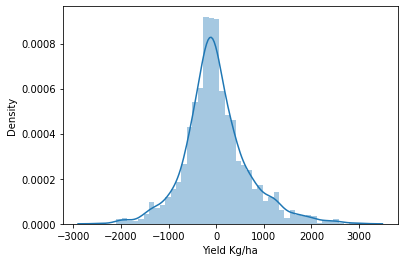

In [75]:
sns.distplot(y_test-y_pred)
plt.show()

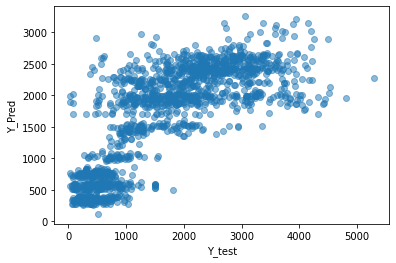

In [76]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()

In [77]:
!pip install xgboost 

In [78]:
import xgboost as xgb

In [79]:
start_time = time.time()
model = xgb.XGBRegressor()
# Обучение модели на обучающем множестве
model.fit(X_train, y_train)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.1266496181488037 sec


In [80]:
# Прогнозирование на тестовом множестве
pred=model.predict(X_test)

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 488.9141191221257
MSE: 476023.2473522296
RMSE: 689.9443798975607


In [82]:
model.score(X_test,y_test)

0.6111430552452045

In [83]:
model.score(X_train,y_train)

0.8135386918155929

In [84]:
y_pred=model.predict(X_test)

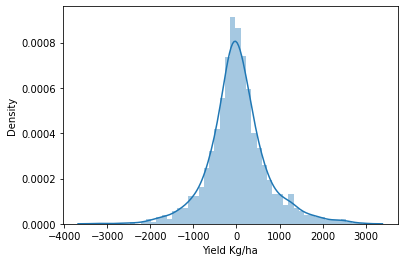

In [85]:
sns.distplot(y_test-y_pred)
plt.show()

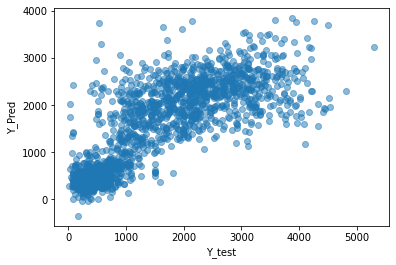

In [86]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()